In [ ]:
plt.plot(df['Date Hour'],df['Rented Bike Count'])

# Time Series Analysis 
## Bike demand forecasting in Seul 

Data Source: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

In [34]:
# import packages 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
#read in file
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")
data = pd.read_csv('SeoulBikeData.csv',
                 parse_dates=['Date'],
                date_parser=custom_date_parser,encoding= 'unicode_escape')
df = data

# Data Exploration


## Data types: 
Categorical variables : 
Quantitative variables: 

Univariate and Bivariate Analysis 

In [36]:
#checking the dataset 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [37]:
df['Hour'] = pd.to_timedelta(df['Hour'], unit = 'h')
df['Date Hour'] = df['Date']+df['Hour']


In [38]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date Hour
0,2017-12-01,254,00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00
1,2017-12-01,204,01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2,2017-12-01,173,02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
3,2017-12-01,107,03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
4,2017-12-01,78,04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00


In [39]:
#Setting datetime as index
df.set_index(['Date Hour'], drop=False)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date Hour
Date Hour,,,,,,,,,,,,,,,
2017-12-01 00:00:00,2017-12-01,254,00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00
2017-12-01 01:00:00,2017-12-01,204,01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2017-12-01 02:00:00,2017-12-01,173,02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
2017-12-01 03:00:00,2017-12-01,107,03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
2017-12-01 04:00:00,2017-12-01,78,04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,2018-11-30,1003,19:00:00,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 19:00:00
2018-11-30 20:00:00,2018-11-30,764,20:00:00,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 20:00:00
2018-11-30 21:00:00,2018-11-30,694,21:00:00,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 21:00:00


In [40]:
#check statistics:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date Hour
count,8760,8760.000000,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,8760
top,2018-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes,2018-08-01 12:00:00
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,1
first,2017-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-01 00:00:00
last,2018-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-30 23:00:00
mean,NaN,704.602055,0 days 11:30:00,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,NaN
std,NaN,644.997468,0 days 06:55:21.294077,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,NaN
min,NaN,0.000000,0 days 00:00:00,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,191.000000,0 days 05:45:00,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [41]:
#checkign data types 
df.dtypes

Date                          datetime64[ns]
Rented Bike Count                      int64
Hour                         timedelta64[ns]
Temperature(°C)                      float64
Humidity(%)                            int64
Wind speed (m/s)                     float64
Visibility (10m)                       int64
Dew point temperature(°C)            float64
Solar Radiation (MJ/m2)              float64
Rainfall(mm)                         float64
Snowfall (cm)                        float64
Seasons                               object
Holiday                               object
Functioning Day                       object
Date Hour                     datetime64[ns]
dtype: object

In [42]:
#check for duplicates 
df.duplicated().sum()

0

In [43]:
#Missing values
df.isnull().values.any()

False

# Data Visualisation 

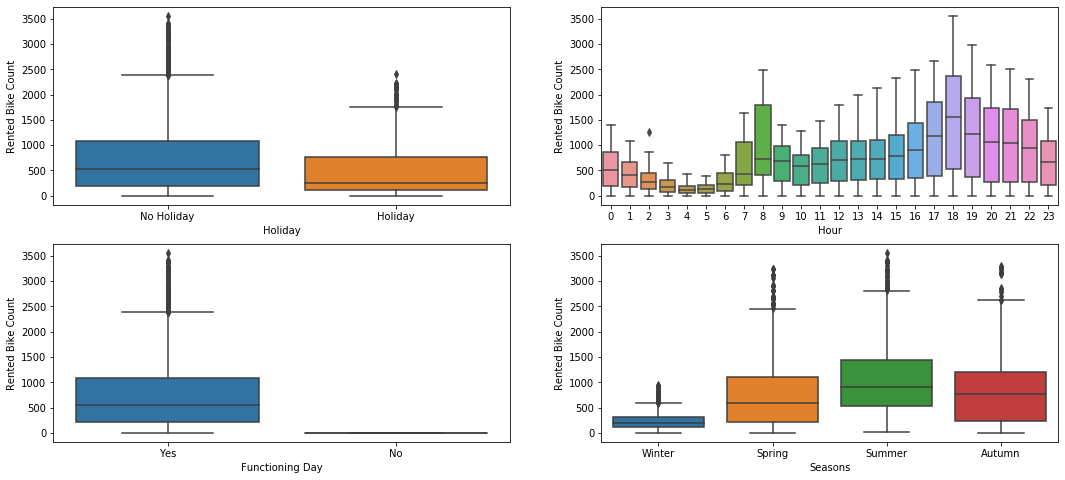

In [53]:
f,ax=plt.subplots(2,2,figsize=(18,8))
#plt.figure(figsize=(15, 10))
sns.boxplot(data=data,x="Holiday", y="Rented Bike Count", ax = ax[0,0])
sns.boxplot(data=data,x=data["Hour"], y="Rented Bike Count", ax = ax[0,1])
sns.boxplot(data=data,x="Functioning Day", y="Rented Bike Count", ax = ax[1,0])
sns.boxplot(data=data,x="Seasons", y="Rented Bike Count", ax = ax[1,1])
plt.show()

In [57]:
#bivariate plotting of numerical data 
num_columns = df[['Rented Bike Count','Temperature(°C)','Humidity(%)', 'Wind speed (m/s)','Visibility (10m)',
           'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
sns.pairplot(num_columns)
plt.show()

KeyboardInterrupt: 

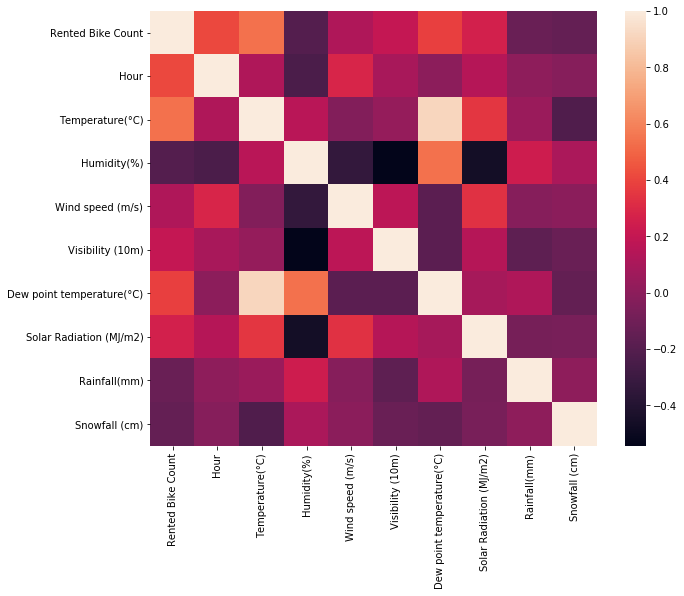

In [6]:
#correlation 
#we can see that Dew Point Temp and Temp are highly correlated. 
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
yticklabels=corr.columns.values)